# Session 2 Further work
These are example solutions of the further work given

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 3. Accuracy & Precision

### Question 1

In [2]:
def approx_cos(x,dx):
    """Approximate cos(x) using approximate derivative of sine"""
    return (np.sin(x+dx) - np.sin(x))/dx

In [3]:
print("With dx 1e-5, the error is ",approx_cos(1.0,1e-5) - np.cos(1.0))
print("With dx 1e-10, the error is ",approx_cos(1.0,1e-10) - np.cos(1.0))
print("With dx 1e-15, the error is ",approx_cos(1.0,1e-15) - np.cos(1.0))

With dx 1e-5, the error is  -4.207362275021609e-06
With dx 1e-10, the error is  -5.848103645789138e-08
With dx 1e-15, the error is  0.014809206444438505


It is interesting that the error *increases* once we make `dx` too small.  This is related to rounding error and accumulation, and we will consider it more in Session 3.

## 4. Approximating reality

### Question 1 (moon due to earth)

In [4]:
# Set up time 
total_time = 2*365*24*60*60 # s
days = 730 # Subdivision
time = np.linspace(0,total_time,days)
# Orbits
period_ES = 365*24*60*60 # s
period_ME = 28*24*60*60 # s

# Physical constants, approximated
radius_ES = 1.5e11 # m
radius_ME = 3.8e8  # m
mass_S = 2e30      # kg
mass_E = 6e24      # kg
mass_M = 7e22      # kg
G = 6.7e-11        # m^3 /kg s^2

In [5]:
# Position of Moon relative to Earth as a 2D array, starting on the x-axis
pos_ME = radius_ME * np.array([np.cos(2 * np.pi * time / period_ME), np.sin(2 * np.pi * time / period_ME)])

Text(0.5, 1.0, 'Acceleration of Moon considering Earth')

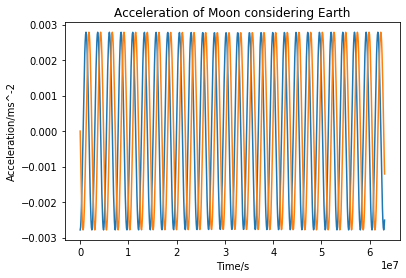

In [6]:
a_ME = -G*mass_E*pos_ME/(radius_ME**3)
plt.plot(time,a_ME[0])
plt.plot(time,a_ME[1])
plt.xlabel("Time/s")
plt.ylabel("Acceleration/ms^-2")
plt.title("Acceleration of Moon considering Earth")

### Question 2 (moon due to earth and sun)

Text(0.5, 1.0, 'Moon-Sun distance')

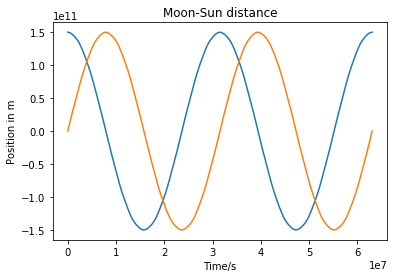

In [7]:
pos_ES = radius_ES * np.array([np.cos(2 * np.pi * time / period_ES), np.sin(2 * np.pi * time / period_ES)])
pos_MS = pos_ME + pos_ES
# Quick check
plt.plot(time,pos_MS[0])
plt.plot(time,pos_MS[1])
plt.xlabel("Time/s")
plt.ylabel("Position in m")
plt.title("Moon-Sun distance")

In [8]:
pos_MS_2 = pos_MS[0]*pos_MS[0] + pos_MS[1]*pos_MS[1]
pos_MS_mag = np.sqrt(pos_MS_2)
pos_MS_3 = pos_MS_2*pos_MS_mag
a_MS = -G*mass_S*pos_MS/(pos_MS_3)
a_M = a_MS + a_ME

Text(0.5, 1.0, 'Acceleration of Moon considering Earth and Sun')

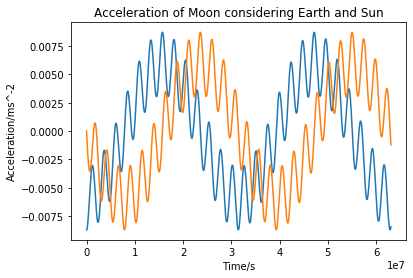

In [9]:
plt.plot(time,a_M[0])
plt.plot(time,a_M[1])
plt.xlabel("Time/s")
plt.ylabel("Acceleration/ms^-2")
plt.title("Acceleration of Moon considering Earth and Sun")

Note that this shows a significant effect from both Sun and Earth (though because we have assumed that the orbits are circular, these are a very crude approximation).  Look at the differences in mass and radius, and check that the influence is reasonable.

## 5 Finding roots

### Question 1

You should find that the relative location of the roots and the initial mid-point will have a strong effect on which root is found (though also note that you might want to have a test to avoid an even number of roots).

#### Question 2 & 3
Here are the secant and Newton-Raphson methods, along with a check for divergence and a simple bisection to improve the NR method.

In [12]:
def cubic_to_solve(x):
    """Calculate f(x) = x^3 - 2x^2 - x + 2"""
    return x * x * x - 2 * x * x - x + 2
def dcubic_to_solve(x):
    """Return df(x) = 3x^2 -4x -1"""
    return 3 * x * x - 4 * x - 1

In [13]:
def secant_method(fun,a,b,tol):
    """Implementation of secant method for root finding.
    Inputs: 
        fun is the function
        a, b bracket the root
        tol is the tolerance
    Outputs: number of iterations and root"""
    x0 = a
    x1 = b
    fx0 = fun(a)
    fx1 = fun(b)
    n = 0
    while abs(x1 - x0) > tol:
        n += 1
        # Calculate next point
        dx = x1 - x0
        df = fx1 - fx0
        xnext = x1 - fx1 * dx / df
        # Update storage
        x0 = x1
        x1 = xnext
        fx0 = fx1
        fx1 = fun(x1)
    return n,x1

In [14]:
iters, root = secant_method(cubic_to_solve,-1.5,-0.5,1e-6)
print("After ",iters," iterations, root is ",root)

After  7  iterations, root is  -0.9999999999918192


In [15]:
def newton_raphson(fun,dfun,x0,tol):
    """Implementation of Newton-Raphson method for root finding.
    Inputs: 
        fun is the function
        dfun is the function's derivative
        x0 is the starting guess
        tol is the tolerance
    Outputs: number of iterations and root"""
    fx = fun(x0)
    dfx = dfun(x0)
    xcurr = x0
    n = 0
    while abs(fx) > tol: # We search for a root
        n += 1
        # Calculate next point
        xcurr = xcurr - fx/dfx
        fx = fun(xcurr)
        dfx = dfun(xcurr)
    return n,xcurr

In [16]:
nit, root = newton_raphson(cubic_to_solve,dcubic_to_solve,-1.5,1e-6)
print("Using NR, starting at -1.5 we find a root of ",root," after ",nit," iterations")

Using NR, starting at -1.5 we find a root of  -1.0000000104979403  after  4  iterations


In [19]:
def newton_raphson_check(fun,dfun,x0,tol):
    """Implementation of Newton-Raphson method for root finding with checks.
    Inputs: 
        fun is the function
        dfun is the function's derivative
        x0 is the starting guess
        tol is the tolerance
    Outputs: number of iterations and root"""
    fx = fun(x0)
    dfx = dfun(x0)
    xcurr = x0
    n = 0
    while abs(fx) > tol: # We search for a root
        n += 1
        # Check for divergence
        if abs(fx/dfx) > 1e3:
            print("Probable divergence found with df(x) ",dfx," after ",n," iterations.")
            return n, None # None signals a failure to find root
        # Calculate next point
        xcurr = xcurr - fx/dfx
        fx = fun(xcurr)
        dfx = dfun(xcurr)
    return n,xcurr

In [20]:
nit, root = newton_raphson_check(cubic_to_solve,dcubic_to_solve,-3,1e-6)
print("Using NR check, starting at -3 we find a root of ",root," after ",nit," iterations")

Using NR check, starting at -3 we find a root of  -1.0000000000866642  after  6  iterations


In [21]:
def newton_raphson_bisection(fun,dfun,a,b,tol):
    """Implementation of Newton-Raphson method for root finding with initial bisection.
    Inputs: 
        fun is the function
        dfun is the function's derivative
        a, b bracket the starting guess
        tol is the tolerance
    Outputs: number of iterations and root"""
    # Start with bisection using tolerance of 1e3*tol (arbitrary!)
    n = 0
    fa = fun(a)
    fb = fun(b)
    while abs(b-a) > 1e3*tol:
        n += 1
        c = (a + b) / 2
        fc = fun(c)
        if fa*fc > 0:
            a = c
            fa = fc
        else:
            b = c
            fb = fc
    # Now switch to NR
    x0 = c
    fx = fun(x0)
    dfx = dfun(x0)
    xcurr = x0
    while abs(fx) > tol: # We search for a root
        n += 1
        # Calculate next point
        xcurr = xcurr - fx/dfx
        fx = fun(xcurr)
        dfx = dfun(xcurr)
    return n,xcurr

In [22]:
nit, root = newton_raphson_bisection(cubic_to_solve,dcubic_to_solve,-1.5,-0.5,1e-8)
print("Using combined, we took ",nit," iterations to find root of ",root)
nit, root = newton_raphson(cubic_to_solve,dcubic_to_solve,-1.5,1e-8)
print("Using NR, we took ",nit," iterations to find root of ",root)

Using combined, we took  18  iterations to find root of  -1.0000000000485059
Using NR, we took  5  iterations to find root of  -1.0000000000000002


## 6. Optimising multi-dimensional functions

### Question 1

In [23]:
def function_2D(x,y):
    """Specified 2D function"""
    return 1.5*x*x + 2*x*y + 3*y*y - x + 4*y

def vector_dfunction_2D(x,y):
    """Vector differential of specified 2D function"""
    df_dx = 3*x + 2*y - 1
    df_dy = 2*x + 6*y + 4
    return df_dx,df_dy

In [24]:
def line_search(f,df,x,y):
    """Simple 2D line search
    Inputs:
    f, df  Function and vector derivative
    x, y   Starting point
    
    Returns:
    Value of lambda such that f((x,y) + lambda*df) is a minimum
    """
    lamb_curr = 0.0
    lamb_new = 0.4
    sd_x, sd_y = df(x,y)
    # We need to search downhill, so change the sign!
    sd_x = -sd_x
    sd_y = -sd_y
    print("Search direction: ",sd_x,sd_y)
    fcurr = f(x,y)
    fnew = f(x+lamb_new*sd_x,y+lamb_new*sd_y)
    while fnew<fcurr:
        print("l,ln,f,fn: ",lamb_curr,lamb_new,fcurr,fnew)
        lamb_curr = lamb_new
        fcurr = fnew
        lamb_new = lamb_curr + 0.4 # Slow; we could multiply by a factor instead
        fnew = f(x+lamb_new*sd_x,y+lamb_new*sd_y)
    # Now we have two points bracketing the minimum
    a = lamb_curr
    fa = fcurr
    b = lamb_new
    fb = fnew
    print("Brackets: ",a,b,fa,fb)
    while abs(b-a)>1e-4: # This should be a user setting ideally
        c = (a + b)/2
        fc = f(x+c*sd_x,y+c*sd_y)
        # Take an extra, small step to find which side of minimum c is on
        fc_delta = f(x+(c+1e-3)*sd_x,y+(c+1e-3)*sd_y)
        if fc_delta < fc: # We went downhill, so on the a side of minimum
            a = c
            fa = fc
        else:
            b = c
            fb = fc
        print("Brackets: ",a,b,fa,fb)
    return c

In [25]:
opt_lam = line_search(function_2D,vector_dfunction_2D,5,-3)
print("The optimum lambda is ",opt_lam)

Search direction:  -8 4
l,ln,f,fn:  0.0 0.4 17.5 -1.7000000000000002
Brackets:  0.4 0.8 -1.7000000000000002 4.700000000000002
Brackets:  0.4 0.6000000000000001 -1.7000000000000002 -1.6999999999999984
Brackets:  0.4 0.5 -1.7000000000000002 -2.5
Brackets:  0.45 0.5 -2.3000000000000007 -2.5
Brackets:  0.475 0.5 -2.4499999999999997 -2.5
Brackets:  0.4875 0.5 -2.4875 -2.5
Brackets:  0.49375 0.5 -2.496875 -2.5
Brackets:  0.496875 0.5 -2.4992187500000003 -2.5
Brackets:  0.4984375 0.5 -2.4998046875 -2.5
Brackets:  0.49921875 0.5 -2.499951171875 -2.5
Brackets:  0.49921875 0.499609375 -2.499951171875 -2.49998779296875
Brackets:  0.4994140625 0.499609375 -2.4999725341796877 -2.49998779296875
Brackets:  0.4994140625 0.49951171875 -2.4999725341796877 -2.499980926513672
The optimum lambda is  0.49951171875
